1. Data ingesion
2. EDA
3. Feature Eng & Preprocessing
4. Model Building
5. Evaluation

Feature Engineering
1. Feature Transformation
2. Feature Construction
3. Feature Selectiom
4. Feature Extraction

Feature Transformation
1. Missing Vlaue
2. Outliers
3. Scaling
4. Encoding
5. Mathematical Transformation (Exp, box-plot, etc)


Feature Construction
1. Spouce + Child + Husband = Family
2. Male + Female = Couple

1. Train Data - Fit Transform
2. Test Data - Transform

## 1. Scaling

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/sharmaroshan/Social-Networks-Ads/master/Social_Network_Ads.csv")

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [4]:
df = df.iloc[:, 2:]

In [5]:
df

,Age,EstimatedSalary,Purchased
0,19.0,19000.0,0
1,35.0,20000.0,0
2,26.0,43000.0,0
3,27.0,57000.0,0
4,19.0,76000.0,0
...,...,...,...
395,46.0,41000.0,1
396,51.0,23000.0,1
397,50.0,20000.0,1
398,36.0,33000.0,0


### train test Split

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
df

,Age,EstimatedSalary,Purchased
0,19.0,19000.0,0
1,35.0,20000.0,0
2,26.0,43000.0,0
3,27.0,57000.0,0
4,19.0,76000.0,0
...,...,...,...
395,46.0,41000.0,1
396,51.0,23000.0,1
397,50.0,20000.0,1
398,36.0,33000.0,0


In [8]:
df.drop("Purchased", axis=1)

,Age,EstimatedSalary
0,19.0,19000.0
1,35.0,20000.0
2,26.0,43000.0
3,27.0,57000.0
4,19.0,76000.0
...,...,...
395,46.0,41000.0
396,51.0,23000.0
397,50.0,20000.0
398,36.0,33000.0


In [9]:
df["Purchased"]

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [10]:
df.shape

(400, 3)

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(df.drop("Purchased", axis=1), df["Purchased"], test_size=0.25)

In [12]:
X_train

,Age,EstimatedSalary
310,42.0,70000.0
169,29.0,47000.0
312,38.0,50000.0
253,37.0,146000.0
228,40.0,72000.0
...,...,...
110,39.0,71000.0
104,19.0,21000.0
158,26.0,30000.0
354,36.0,99000.0


In [13]:
X_test

,Age,EstimatedSalary
177,25.0,22000.0
223,60.0,102000.0
333,40.0,65000.0
143,30.0,89000.0
115,40.0,57000.0
...,...,...
272,60.0,42000.0
308,36.0,125000.0
48,30.0,135000.0
296,42.0,73000.0


In [14]:
Y_train

310    0
169    0
312    0
253    1
228    0
      ..
110    0
104    0
158    0
354    1
16     1
Name: Purchased, Length: 300, dtype: int64

In [15]:
Y_test

177    0
223    1
333    0
143    0
115    0
      ..
272    1
308    1
48     1
296    1
270    0
Name: Purchased, Length: 100, dtype: int64

## StandardScaler

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [18]:
scaler.fit(X_train)

StandardScaler()

In [19]:
X_train_scaled = scaler.transform(X_train)

In [20]:
X_test_scaled = scaler.transform(X_test)

In [21]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

In [22]:
X_train

,Age,EstimatedSalary
310,42.0,70000.0
169,29.0,47000.0
312,38.0,50000.0
253,37.0,146000.0
228,40.0,72000.0
...,...,...
110,39.0,71000.0
104,19.0,21000.0
158,26.0,30000.0
354,36.0,99000.0


In [23]:
X_train.describe()

,Age,EstimatedSalary
count,300.000000,300.000000
mean,37.550000,70056.666667
std,10.475046,33977.566702
min,18.000000,15000.000000
25%,29.000000,43750.000000
50%,37.000000,71000.000000
75%,46.000000,87000.000000
max,60.000000,150000.000000


In [24]:
X_train_scaled

,Age,EstimatedSalary
0,0.425529,-0.001671
1,-0.817589,-0.679719
2,0.043031,-0.591278
3,-0.052593,2.238837
4,0.234280,0.057290
...,...,...
295,0.138655,0.027810
296,-1.773834,-1.446208
297,-1.104463,-1.180885
298,-0.148218,0.853260


In [25]:
import numpy as np
np.round(X_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,300.0,300.0
mean,0.0,-0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.1,2.4


## Effect of Scaling

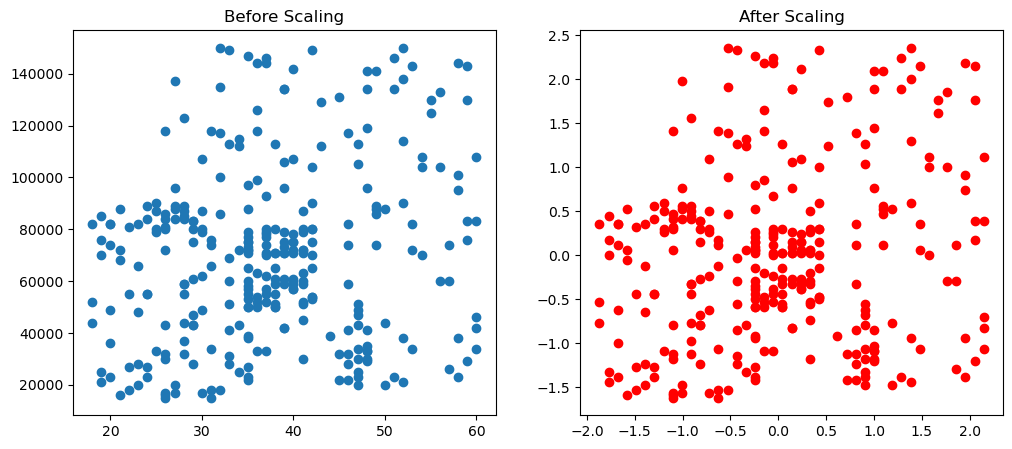

In [26]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")

ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'], color = 'red')
ax2.set_title('After Scaling')

plt.show()

<Axes: xlabel='EstimatedSalary', ylabel='Density'>

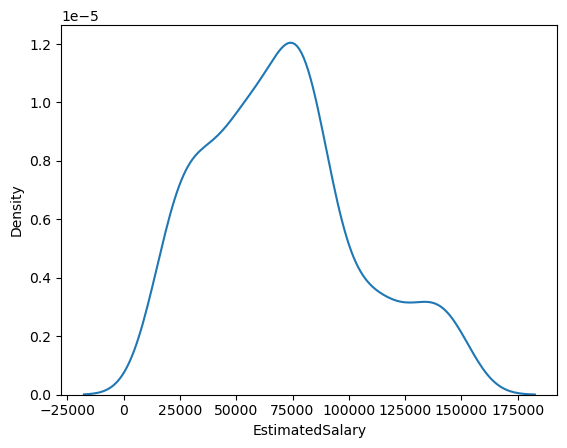

In [27]:
# model
import seaborn as sns
sns.kdeplot(X_train['EstimatedSalary'])

<Axes: xlabel='EstimatedSalary', ylabel='Density'>

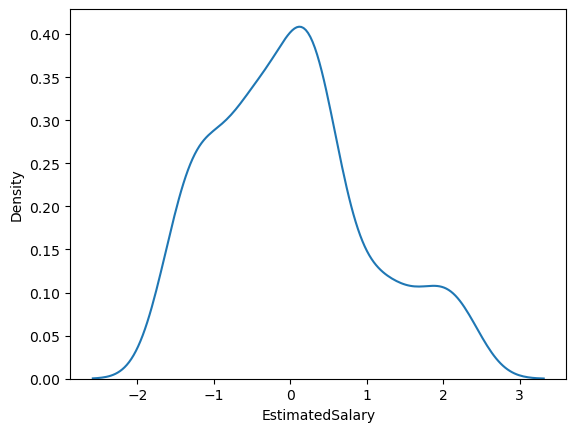

In [28]:
# model
import seaborn as sns
sns.kdeplot(X_train_scaled['EstimatedSalary'])

In [29]:
X_train.describe()

,Age,EstimatedSalary
count,300.000000,300.000000
mean,37.550000,70056.666667
std,10.475046,33977.566702
min,18.000000,15000.000000
25%,29.000000,43750.000000
50%,37.000000,71000.000000
75%,46.000000,87000.000000
max,60.000000,150000.000000


## min-max

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler_min_max = MinMaxScaler()

In [31]:
scaler_min_max.fit(X_train)

MinMaxScaler()

In [32]:
X_train_min_max = scaler_min_max.transform(X_train)

In [33]:
X_test_min_max = scaler_min_max.transform(X_test)

In [34]:
X_train_min_max = pd.DataFrame(X_train_min_max, columns=X_train.columns)
X_test_min_max = pd.DataFrame(X_test_min_max, columns=X_test.columns)

In [35]:
np.round(X_train_min_max.describe(), 1)

,Age,EstimatedSalary
count,300.0,300.0
mean,0.5,0.4
std,0.2,0.3
min,0.0,0.0
25%,0.3,0.2
50%,0.5,0.4
75%,0.7,0.5
max,1.0,1.0


In [36]:
X_test_min_max

,Age,EstimatedSalary
0,0.166667,0.051852
1,1.000000,0.644444
2,0.523810,0.370370
3,0.285714,0.548148
4,0.523810,0.311111
...,...,...
95,1.000000,0.200000
96,0.428571,0.814815
97,0.285714,0.888889
98,0.571429,0.429630


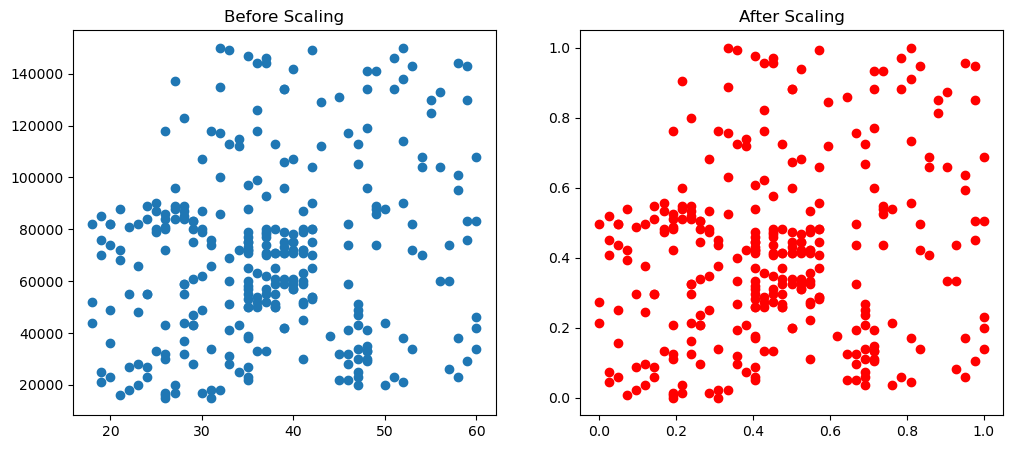

In [37]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")

ax2.scatter(X_train_min_max['Age'], X_train_min_max['EstimatedSalary'], color = 'red')
ax2.set_title('After Scaling')

plt.show()

## Use of these techniques

CGPA = 0 to 1 --> `Min Max` to be used as there is a specific range.

Salary = unknown --> `Standard Scaler` is used as we are unaware of rich people's salary

## Encoding

In [38]:
df2_ = pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day26-ordinal-encoding/customer.csv")

In [39]:
df2_.head()

,age,gender,review,education,purchased
0,30,Female,Average,School,No
1,68,Female,Poor,UG,No
2,70,Female,Good,PG,No
3,72,Female,Good,PG,No
4,16,Female,Average,UG,No


In [40]:
df2_.sample(5)

,age,gender,review,education,purchased
27,69,Female,Poor,PG,No
1,68,Female,Poor,UG,No
37,94,Male,Average,PG,Yes
8,65,Female,Average,UG,No
32,92,Male,Average,UG,Yes


In [41]:
df2 = df2_.iloc[:,2:-1]

In [42]:
df2.head()

,review,education
0,Average,School
1,Poor,UG
2,Good,PG
3,Good,PG
4,Average,UG


In [43]:
df2.shape

(50, 2)

In [44]:
X_train, X_test= train_test_split(df2, test_size=0.25)

In [45]:
X_train

,review,education
37,Average,PG
4,Average,UG
2,Good,PG
39,Poor,PG
47,Good,PG
5,Average,School
16,Poor,UG
1,Poor,UG
13,Average,School
29,Average,UG


In [46]:
X_test

,review,education
48,Good,UG
10,Good,UG
18,Good,School
11,Good,UG
24,Average,PG
0,Average,School
23,Good,School
14,Poor,PG
22,Poor,PG
38,Good,School


In [47]:
df2["review"].value_counts()

Poor       18
Good       18
Average    14
Name: review, dtype: int64

In [48]:
df2["education"].value_counts()

PG        18
School    16
UG        16
Name: education, dtype: int64

In [49]:
from sklearn.preprocessing import OrdinalEncoder

In [50]:
encoder = OrdinalEncoder(categories=[["Poor", "Average", "Good"], ["School", "UG", "PG"]])

In [51]:
encoder.fit(X_train)

OrdinalEncoder(categories=[['Poor', 'Average', 'Good'], ['School', 'UG', 'PG']])

In [52]:
X_train_encode = encoder.transform(X_train)

In [53]:
X_train_encode

array([[1., 2.],
       [1., 1.],
       [2., 2.],
       [0., 2.],
       [2., 2.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 1.],
       [1., 1.],
       [0., 2.],
       [0., 2.],
       [0., 2.],
       [2., 0.],
       [2., 2.],
       [0., 1.],
       [1., 1.],
       [0., 1.],
       [2., 0.],
       [0., 0.],
       [1., 1.],
       [2., 1.],
       [2., 0.],
       [0., 2.],
       [0., 0.],
       [0., 2.],
       [2., 1.],
       [0., 2.],
       [2., 1.],
       [1., 2.],
       [1., 1.],
       [2., 2.],
       [1., 0.],
       [2., 2.],
       [2., 2.],
       [0., 0.]])

In [54]:
X_test_encode = encoder.transform(X_test)

In [55]:
df2_.head()

,age,gender,review,education,purchased
0,30,Female,Average,School,No
1,68,Female,Poor,UG,No
2,70,Female,Good,PG,No
3,72,Female,Good,PG,No
4,16,Female,Average,UG,No


In [56]:
df2 = df2_[["gender", "age"]]

In [57]:
df2

,gender,age
0,Female,30
1,Female,68
2,Female,70
3,Female,72
4,Female,16
5,Female,31
6,Male,18
7,Female,60
8,Female,65
9,Male,74


In [58]:
from sklearn.preprocessing import OneHotEncoder

In [59]:
ohe = OneHotEncoder(drop="first", sparse=False, dtype=np.int32)

In [60]:
ohe.fit(df2[["gender"]])

C:\Users\Rishav\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(drop='first', dtype=<class 'numpy.int32'>, sparse=False,
              sparse_output=False)

In [61]:
ohe.transform(df2[["gender"]])

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0]])

## Handling Missing Value

In [62]:
df3 = pd.read_csv("titanic_train.csv")

In [63]:
df3

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [64]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [65]:
df3 = df3[["Age", "Fare", "SibSp", "Survived"]]

In [66]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      891 non-null    float64
 2   SibSp     891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [67]:
df3.head()

,Age,Fare,SibSp,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [68]:
df3.isnull()

,Age,Fare,SibSp,Survived
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
886,False,False,False,False
887,False,False,False,False
888,True,False,False,False
889,False,False,False,False


In [69]:
df3.isnull().mean()

Age         0.198653
Fare        0.000000
SibSp       0.000000
Survived    0.000000
dtype: float64

#### Numerical Value ==> mean, median

#### Categorical Variable ==> mode

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(df3, test_size=0.25)

In [71]:
X_train

,Age,Fare,SibSp,Survived
13,39.0,31.2750,1,0
784,25.0,7.0500,0,0
485,NaN,25.4667,3,0
166,NaN,55.0000,0,1
85,33.0,15.8500,3,1
...,...,...,...,...
274,NaN,7.7500,0,1
304,NaN,8.0500,0,0
751,6.0,12.4750,0,1
82,NaN,7.7875,0,1


In [72]:
X_test

,Age,Fare,SibSp,Survived
596,NaN,33.0000,0,1
230,35.0,83.4750,1,1
661,40.0,7.2250,0,0
192,19.0,7.8542,1,1
155,51.0,61.3792,0,0
...,...,...,...,...
541,9.0,31.2750,4,0
336,29.0,66.6000,1,0
520,30.0,93.5000,0,1
586,47.0,15.0000,0,0


In [73]:
mean_age = X_train["Age"].mean()

In [74]:
X_train["Age"].fillna(mean_age)

13     39.000000
784    25.000000
485    29.075321
166    29.075321
85     33.000000
         ...    
274    29.075321
304    29.075321
751     6.000000
82     29.075321
674    29.075321
Name: Age, Length: 668, dtype: float64

In [75]:
X_train["Age"].fillna(mean_age).isnull().sum()

0

In [76]:
median_age = X_train["Age"].median()

In [77]:
X_train["Age"].fillna(median_age)

13     39.0
784    25.0
485    28.0
166    28.0
85     33.0
       ... 
274    28.0
304    28.0
751     6.0
82     28.0
674    28.0
Name: Age, Length: 668, dtype: float64

In [78]:
mean_age

29.07532075471698

In [79]:
median_age

28.0

### Sklearn -- Simpleimputer

In [80]:
df3 = pd.read_csv("titanic_train.csv")

In [81]:
df3["Cabin"].mode()

0        B96 B98
1    C23 C25 C27
2             G6
Name: Cabin, dtype: object

In [82]:
df3["Cabin"].fillna(df3["Cabin"].mode()[0])

0      B96 B98
1          C85
2      B96 B98
3         C123
4      B96 B98
        ...   
886    B96 B98
887        B42
888    B96 B98
889       C148
890    B96 B98
Name: Cabin, Length: 891, dtype: object

### Multivariate -- KNNimputer